# Import thư viện

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import itertools
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler
from sklearn.ensemble import IsolationForest
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter(action = "ignore")

#**1. EDA (Exploratory Data Analysis)**

In [ ]:
df_train = pd.read_json("/content/train.json", lines=True)
df_dev = pd.read_json("/content/dev.json", lines=True)

In [ ]:
df_train.shape

(5049, 9)

Tập dữ liệu huấn luyện có 5049 mẫu và 9 cột.

In [ ]:
df_dev.shape

(721, 9)

Tập dữ liệu kiểm thử có 721 mẫu và 9 cột.

In [ ]:
df = pd.concat([df_train, df_dev], axis=0)

In [ ]:
df.shape

(5770, 9)

Bộ dữ liệu có 5049 + 721 = 5770 mẫu và 9 cột.

In [ ]:
df.head(5)

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid
0,Male,38,African-American,1,1,0,9,F,1
1,Male,51,Caucasian,0,0,0,4,M,0
2,Female,38,Hispanic,0,0,0,0,F,0
3,Male,42,Caucasian,0,0,0,0,M,0
4,Male,33,African-American,0,0,0,1,F,1


In [ ]:
df.tail(5)

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid
716,Male,26,African-American,0,0,0,0,F,0
717,Male,38,African-American,0,0,0,5,M,0
718,Male,57,African-American,0,0,0,12,F,0
719,Male,38,Caucasian,0,0,0,4,M,1
720,Male,67,Hispanic,0,0,0,2,F,0


Bộ dữ liệu gồm 8 features với 1 target.

Categorical Columns (Cột phân loại):
*   **"sex"**: Giới tính của đối tượng (có thể là 'male' hoặc 'female').

*   **"race"**: Dân tộc hoặc chủng tộc của đối tượng.
*   **"c_charge_degree"**: Mức độ phạm tội được phân loại thành nhẹ ('M') hoặc nặng ('F').

Numerical Columns (Cột số liệu):

*   **"age"**: Tuổi của đối tượng.

*   **"juv_fel_count"**: Số lần đối tượng phạm tội nặng khi là vị thành niên.
*   **"juv_misd_count"**: Số lần đối tượng phạm tội nhẹ khi là vị thành niên.
*   **"juv_other_count"**: Số lần đối tượng phạm tội vị thành niên khác.
*   **"priors_count"**: Tổng số lần đối tượng đã phạm tội trước đó.

Target Column (Cột mục tiêu):
*  **"two_year_recid"**: Một biến nhị phân (binary) đại diện cho việc đối tượng có hay không có bản án tái phạm trong vòng hai năm.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5770 entries, 0 to 720
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sex              5770 non-null   object
 1   age              5770 non-null   int64 
 2   race             5770 non-null   object
 3   juv_fel_count    5770 non-null   int64 
 4   juv_misd_count   5770 non-null   int64 
 5   juv_other_count  5770 non-null   int64 
 6   priors_count     5770 non-null   int64 
 7   c_charge_degree  5770 non-null   object
 8   two_year_recid   5770 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 450.8+ KB


Bộ dữ liệu này bao gồm tổng cộng 5770 bản ghi và 9 cột thông tin.

Mỗi cột có thể chứa kiểu dữ liệu số nguyên (int64) hoặc kiểu dữ liệu phân loại (object).

Một điểm quan trọng là không có giá trị nào bị thiếu (non-null) nào xuất hiện trong tập dữ liệu, cho thấy dữ liệu là đầy đủ và không có vấn đề về giá trị bị thiếu.

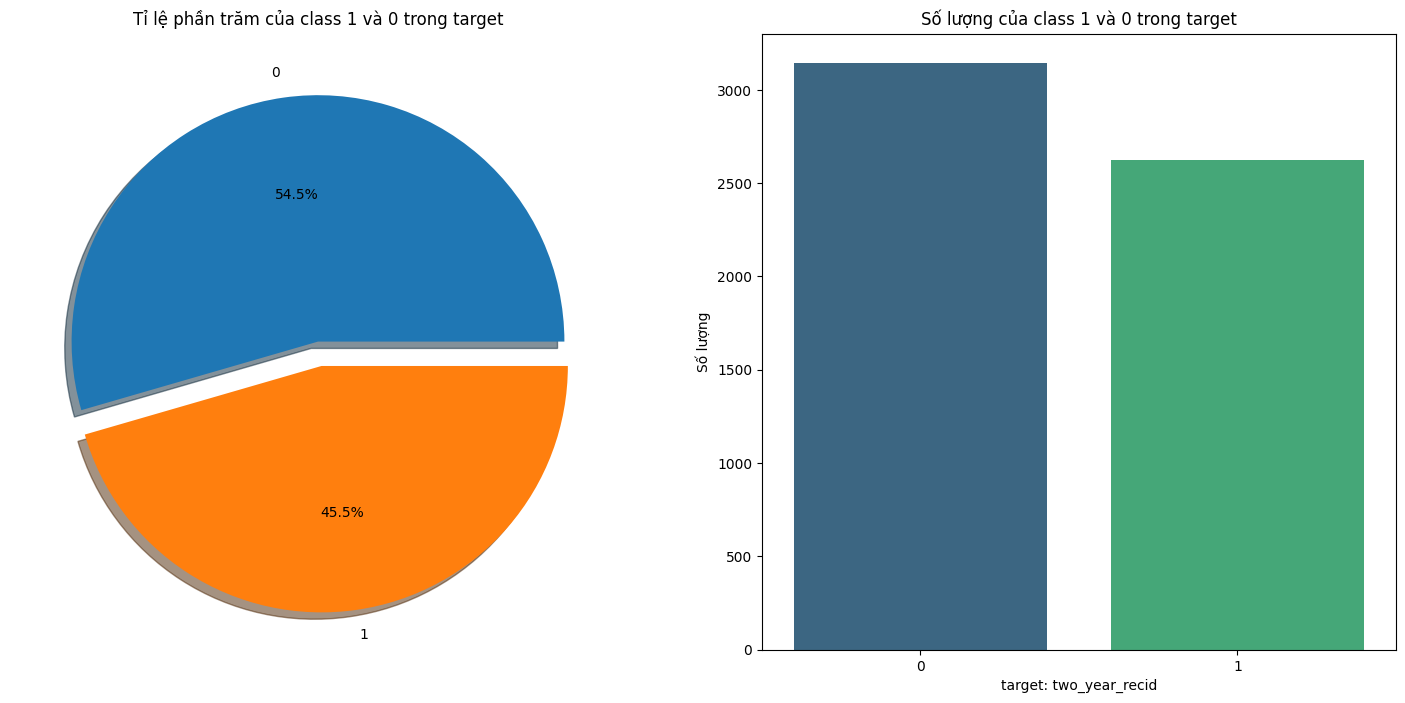

In [ ]:
#Trực quan hóa sự phân bố của biến kết quả
f,ax=plt.subplots(1,2,figsize=(18,8))
df['two_year_recid'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Tỉ lệ phần trăm của class 1 và 0 trong target')
ax[0].set_ylabel('')

sns.countplot(x='two_year_recid', data=df, palette='viridis')
plt.title('Số lượng của class 1 và 0 trong target')
plt.xlabel('target: two_year_recid')
plt.ylabel('Số lượng')

plt.show()

In [ ]:
df.sex.value_counts()

Male      4651
Female    1119
Name: sex, dtype: int64

In [ ]:
df.race.value_counts()

African-American    2939
Caucasian           1993
Hispanic             499
Other                297
Asian                 26
Native American       16
Name: race, dtype: int64

In [ ]:
df.juv_fel_count.value_counts()

0    5549
1     153
2      35
3      14
4      11
5       4
8       2
6       1
9       1
Name: juv_fel_count, dtype: int64

In [ ]:
df.juv_misd_count.value_counts()

0     5442
1      225
2       61
3       22
4        8
5        5
6        3
8        2
13       1
12       1
Name: juv_misd_count, dtype: int64

In [ ]:
df.juv_other_count.value_counts()

0     5350
1      292
2       84
3       23
4       12
5        4
7        2
9        1
6        1
17       1
Name: juv_other_count, dtype: int64

In [ ]:
df.priors_count.value_counts()

0     1722
1     1108
2      672
3      454
4      323
5      264
6      194
7      169
8      149
9      119
10      88
11      81
12      63
13      61
14      41
15      40
16      33
19      28
17      27
18      21
20      20
22      18
21      16
23      12
24       8
25       8
28       6
26       6
27       6
29       3
38       2
31       2
30       2
33       2
36       1
37       1
Name: priors_count, dtype: int64

In [ ]:
df.c_charge_degree.value_counts()

F    3712
M    2058
Name: c_charge_degree, dtype: int64

In [ ]:
df.two_year_recid.value_counts()

0    3144
1    2626
Name: two_year_recid, dtype: int64

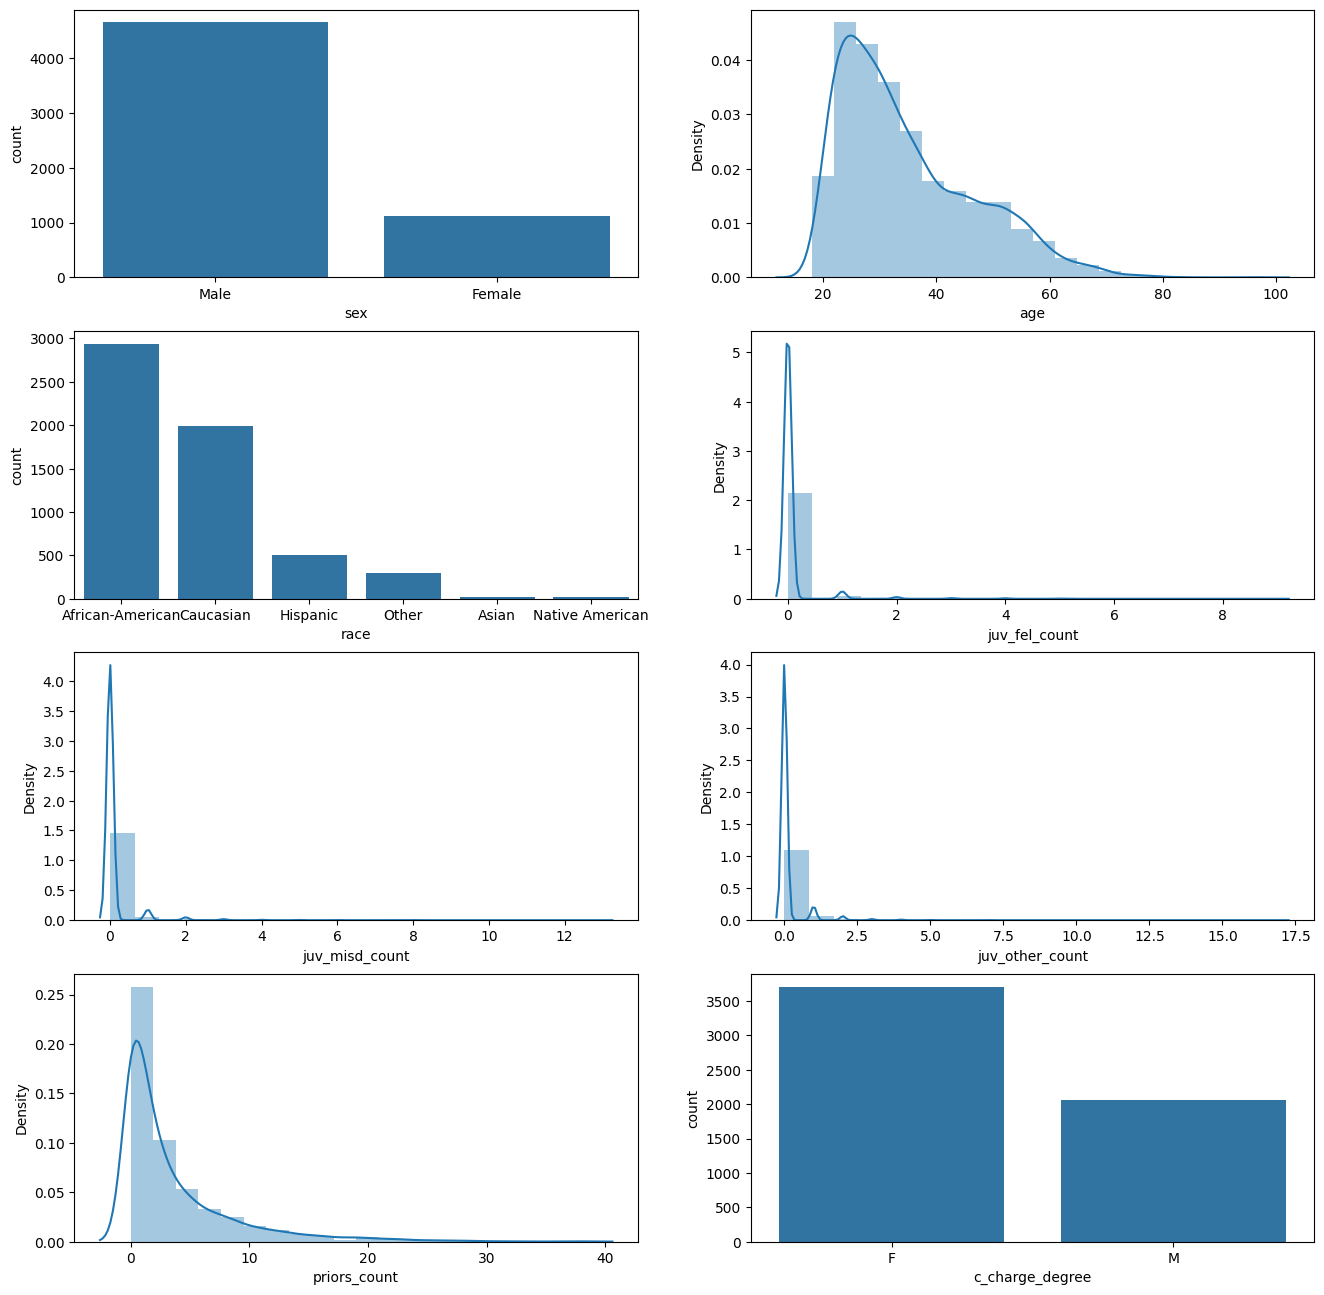

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

sns.countplot(x='sex', data=df, ax=ax[0, 0])
sns.distplot(df.age, bins=20, ax=ax[0, 1])
sns.countplot(x='race', data=df, ax=ax[1, 0])
sns.distplot(df.juv_fel_count, bins=20, ax=ax[1, 1])
sns.distplot(df.juv_misd_count, bins=20, ax=ax[2, 0])
sns.distplot(df.juv_other_count, bins=20, ax=ax[2, 1])
sns.distplot(df.priors_count, bins=20, ax=ax[3, 0])
sns.countplot(x='c_charge_degree', data=df, ax=ax[3, 1])

plt.show()


Các cột "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", "c_charge_degree" có sự chênh lệch lớn giữa các giá trị, tuy nhiên, sự chênh lệch này là hợp lý và phản ánh đặc tính tự nhiên của dữ liệu. Tuy nhiên, để đảm bảo tính ổn định và hiệu quả trong việc huấn luyện mô hình, chúng cần được chuẩn hóa để đưa về cùng một khoảng giá trị.

Còn đối với cột "race", có vẻ xuất hiện sự mất cân bằng nghiêm trọng giữa các giá trị, điều này có thể dẫn đến sự thiên vị trong mô hình. Việc xử lý sự mất cân bằng này có thể được thực hiện thông qua các phương pháp như oversampling, undersampling hoặc sử dụng các thuật toán xử lý mất cân bằng như SMOTE để tạo ra một tập dữ liệu cân bằng hơn.

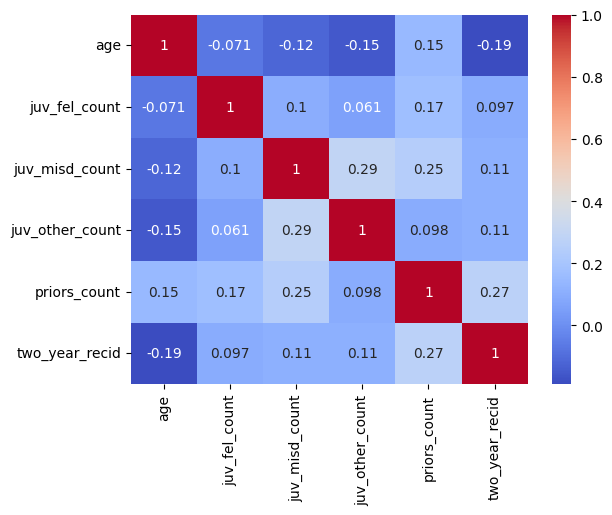

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Nhận xét:** Dựa trên biểu đồ tương quan, không có feature nào thể hiện mối tương quan cao với nhau. Do đó, nhóm sẽ cân nhắc đến việc có hay không áp dụng và chọn kỹ thuật Feature Selection phù hợp để mang lại hiệu suất tốt, vì không có sự phụ thuộc mạnh mẽ giữa các feature trong tập dữ liệu.

## Sự thiên vị của tập dữ liệu

Những cột có thể xảy ra tình trạng thiên vị đó là "sex", "age", "race" và "c_charge_degree". Vì chúng là các yếu tố liên quan đến đặc điểm cá nhân của đối tượng và thông tin về hành vi phạm tội, có khả năng chúng có thể ảnh hưởng đến quá trình đánh giá rủi ro tội phạm.

Những cột "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count" không được xem là thiên vị bởi vì chúng thường liên quan đến lịch sử phạm tội của đối tượng, và được xem xét dựa trên dữ liệu quá khứ thay vì các đặc điểm cá nhân. Do đó, chúng có thể không tạo ra tình trạng thiên vị trong việc đánh giá rủi ro tội phạm.

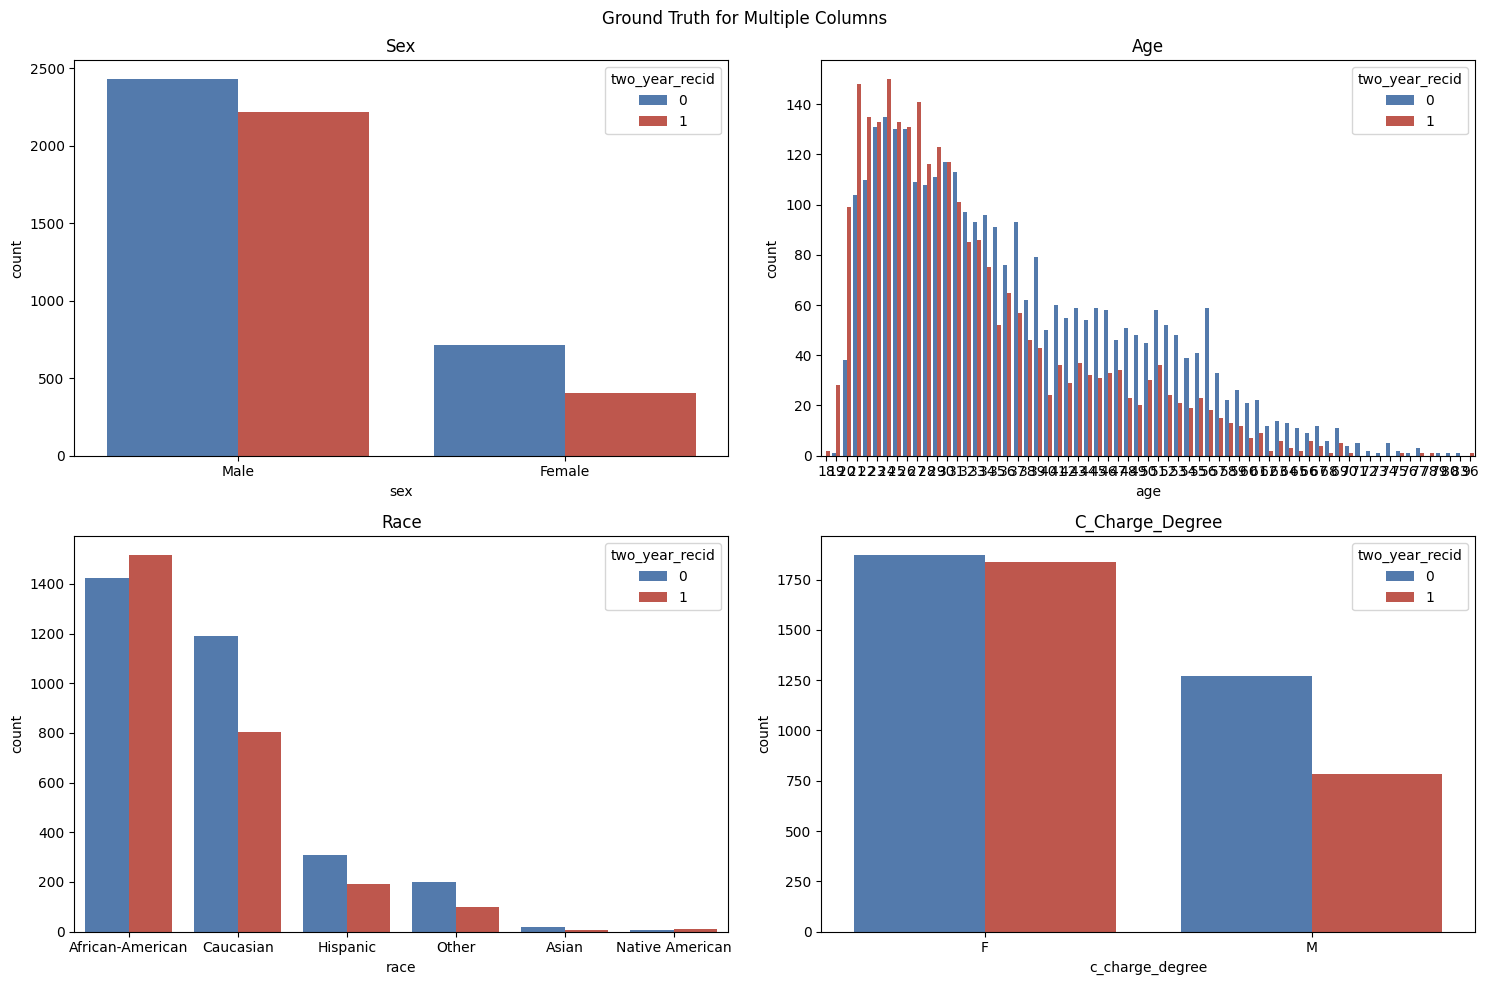

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=plt.cbook.mplDeprecation)
br_palette = sns.diverging_palette(250, 15, n=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Adjust dimensions as needed
fig.suptitle("Ground Truth for Multiple Columns")

columns_to_plot = ["sex", "age", "race", "c_charge_degree"]

for i, col in enumerate(columns_to_plot):
    ax = axes.flat[i]  # Access the correct subplot
    sns.countplot(x=col, hue="two_year_recid", data=df, palette=br_palette, ax=ax)
    ax.set_title(col.title())  # Set title for each subplot

plt.tight_layout()  # Adjust spacing for better readability
plt.show()

Đây là các biểu đồ cột (countplot) cho phân phối "two_year_recid" dựa trên giá trị của các cột "sex", "age", "race", và "c_charge_degree" từ DataFrame `df`. Mục đích là quan sát mối quan hệ giữa các đặc điểm và mục tiêu "two_year_recid".

Nhìn vào biểu đồ, có thể nhận ra sự thiên vị trong cột "race" bởi sự chênh lệch đáng kể giữa các phân phối của "two_year_recid" dựa trên từng giá trị của cột "race". Sự chênh lệch này có thể ám chỉ rằng quá trình đánh giá rủi ro tội phạm có thể bị ảnh hưởng hoặc có sự chệch lệch tùy thuộc vào giá trị của "race". Điều này làm nảy sinh nghi vấn về công bằng trong quá trình đánh giá và quyết định hình phạt. Các cột khác như "sex", "age", và "c_charge_degree" gần như không có sự thiên vị, vì phân phối của "two_year_recid" giữa các giá trị của chúng không thay đổi đáng kể.



In [ ]:
!pip install holisticai
from holisticai.bias.plots import group_pie_plot

<Axes: >

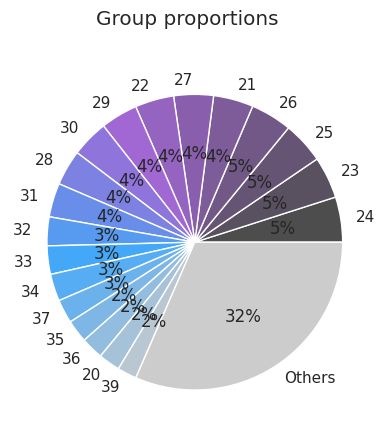

In [ ]:
group_pie_plot(df.age)

Phân phối theo độ tuổi ở cột "age" rất đều nhau.

<Axes: >

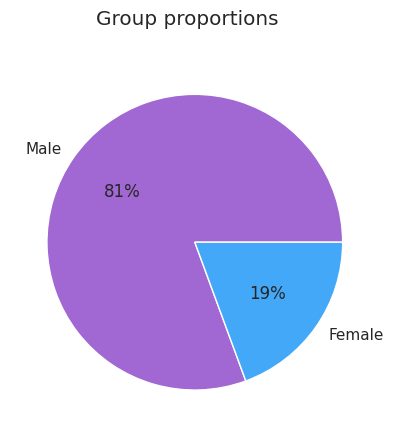

In [ ]:
group_pie_plot(df.sex)

Có sự chênh lệch lớn trong phân phối giữa Male và Female nhưng chêch lệch này là hợp lý bởi sự chênh lệch lớn giữa số lượng nam và nữ có vẻ là điều hiển nhiên.

<Axes: >

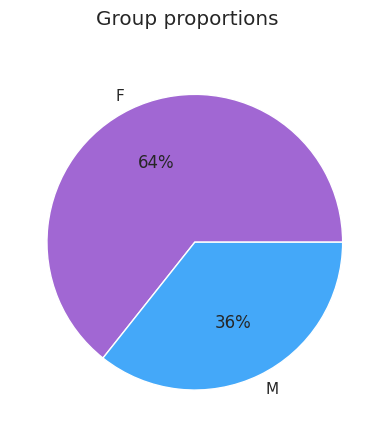

In [ ]:
group_pie_plot(df.c_charge_degree)

Đây là một phân phối tốt đến từ cột "c_charge_degree". Nó không làm tập dữ liệu quá mất cân bằng hay thiên vị.

<Axes: >

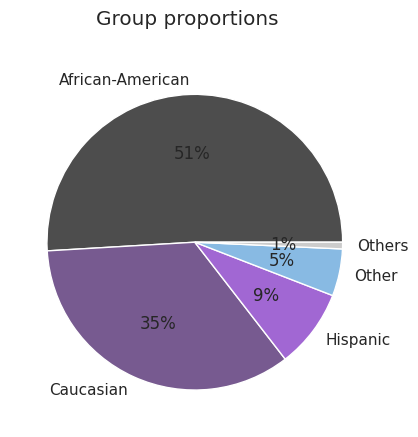

In [ ]:
group_pie_plot(df.race)

Có thể thấy, người African-American và Caucasian chiếm số lượng lớn. Trong khi Others chỉ chiếm khoảng 1%, Other là 5%, và Hispanic là 9%, đây là những con số rất nhỏ so với phần còn lại. Sự chênh lệch này là quá lớn. Điều này có thể tạo ra sự thiên vị (bias) và không công bằng (unfairness) trong dữ liệu, vì một số nhóm nhỏ được đại diện ít hơn so với nhóm lớn, có thể ảnh hưởng đến khả năng tổng quát hóa của mô hình hoặc quyết định dựa trên dữ liệu này.

In [ ]:
df.race.value_counts()

African-American    2939
Caucasian           1993
Hispanic             499
Other                297
Asian                 26
Native American       16
Name: race, dtype: int64

Phân phối giá trị trong cột "race" cho thấy sự chênh lệch lớn về số lượng giữa các nhóm. African-American chiếm số lượng cao nhất (2939), trong khi Native American (16) và Asian (26) có số lượng rất thấp. Sự chênh lệch này có thể tạo ra thách thức khi xử lý dữ liệu và xây dựng mô hình, đặc biệt là khi cần đảm bảo công bằng và tránh thiên vị trong quá trình phân loại.

(cái này ko cần thêm vào) Để giải quyết vấn đề thiên vị này, chúng tôi đề xuất khám phá và sử dụng thư viện holisticai, cho phép đo lường độ chệch (bias) có mặt trong các mô hình Trí tuệ Nhân tạo. Với điều này, thư viện này có nhiều hàm khác để đo lường độ chệch không chỉ cho phân loại nhị phân (Binary Classification) mà còn cho phân loại nhiều lớp. Ngoài ra, thư viện không chỉ cung cấp các giá trị tính toán cho các chỉ số công bằng, mà còn cung cấp các giá trị tham chiếu chỉ ra một mô hình Trí tuệ Nhân tạo không thiên vị lý tưởng. Do đó, giá trị càng gần với tham chiếu, mô hình của chúng ta càng công bằng.
(Tham khảo: https://www.kaggle.com/code/osocapo/fairness-analysis-for-binary-classification)

# **2. Tiền xử lý**

## Encode category


In [ ]:
cate_cols = ['sex', 'age', 'race', 'c_charge_degree']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit và transform cho DataFrame df_train
df_train[cate_cols] = ordinal_encoder.fit_transform(df_train[cate_cols])

# Transform cho DataFrame df_dev (sử dụng LabelEncoder đã được fit từ df_train)
df_dev[cate_cols] = ordinal_encoder.transform(df_dev[cate_cols])

In [ ]:
df[cate_cols] = ordinal_encoder.transform(df[cate_cols])

## Missing Observation Analysis

In [ ]:
# Lấy trung vị của tất cả các cột trong df_train
median_values = df_train.median()

# Điền giá trị null trong df_train bằng giá trị trung vị
df_train.fillna(median_values, inplace=True)
# Điền giá trị null trong df_dev bằng giá trị trung vị (sử dụng median_values của df_train)
df_dev.fillna(median_values, inplace=True)

Đoạn mã trên được sử dụng để kiểm tra và điền các giá trị bị thiếu (null) trong tập huấn luyện (`df_train`) và tập kiểm tra (`df_dev`). Tuy nhiên, ở thời điểm hiện tại, không có giá trị nào bị thiếu trong cả `df_train` và `df_dev`.

## **Chuẩn hóa dữ liệu**

### Khi có chuẩn hóa

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y_train = df_train["two_year_recid"]
X_train = df_train.drop(["two_year_recid"], axis = 1)

y_dev = df_dev["two_year_recid"]
X_dev = df_dev.drop(["two_year_recid"], axis = 1)

In [ ]:
# Validation scores of all base models
# Thiết lập tham số cho LGBMClassifier
lgbm_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
# Tạo mô hình LGBMClassifier với tham số đã cài đặt
lgbm_model = LGBMClassifier(verbose=0, random_state=12345, **lgbm_params)

# Thiết lập tham số cho GradientBoostingClassifier
gb_params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_split': 0.23333333333333334,
    'n_estimators': 100,
    'subsample': 1.0
}
xgb_params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.5,
    'max_depth': 5,
    'n_estimators': 180
}

# Tạo mô hình XGBClassifier với tham số đã cài đặt
xgb_model = XGBClassifier(random_state=12345, **xgb_params)

# Tạo mô hình GradientBoostingClassifier với tham số đã cài đặt
gb_model = GradientBoostingClassifier(random_state=12345, **gb_params)

# Thiết lập tham số cho GradientBoostingClassifier
sgd_params = {
    'max_depth': 4,
    'subsample': 0.9,
    'n_estimators': 200
}

# Tạo mô hình GradientBoostingClassifier với tham số đã cài đặt và random_state
sgd_model = GradientBoostingClassifier(random_state=12345, **sgd_params)

# Thiết lập tham số cho DecisionTreeClassifier
dt_params = {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 3, 'splitter': 'random'}

# Tạo mô hình DecisionTreeClassifier với tham số đã cài đặt
dt_model = DecisionTreeClassifier(random_state=12345, **dt_params)
# Thiết lập tham số cho AdaBoostClassifier
adaboost_params = {
    'base_estimator': DecisionTreeClassifier(random_state=12345),
    'n_estimators': 180
}

# Tạo mô hình AdaBoostClassifier với tham số đã cài đặt
adaboost_model = AdaBoostClassifier(random_state=12345, **adaboost_params)

from sklearn.linear_model import SGDClassifier

# Thiết lập tham số cho GradientBoostingClassifier
sgd_params = {
    'max_depth': 4,
    'subsample': 0.9,
    'max_features': 0.75,
    'n_estimators': 200
}

# Tạo mô hình GradientBoostingClassifier với tham số đã cài đặt và random_state
sgd_model = GradientBoostingClassifier(random_state=12345, **sgd_params)

# Thiết lập tham số cho LogisticRegression
lr_params = {'C': 0.1, 'penalty': 'l2'}

# Tạo mô hình LogisticRegression với tham số đã cài đặt
lr_model = LogisticRegression(random_state=12345, **lr_params)

# Thiết lập tham số cho KNeighborsClassifier (đặt tùy ý)
knn_params = {
    'n_neighbors': 5,  # Số lân cận
    'weights': 'uniform',  # Phương pháp trọng số (có thể là 'uniform' hoặc 'distance')
    'algorithm': 'auto'  # Thuật toán tính khoảng cách (có thể là 'auto', 'ball_tree', 'kd_tree', 'brute')
}

# Tạo mô hình KNeighborsClassifier với tham số đã cài đặt
knn_model = KNeighborsClassifier(**knn_params)

# Thiết lập tham số cho SVC
svm_params = {'C': 10, 'gamma': 0.01}

# Tạo mô hình SVC với tham số đã cài đặt
svm_model = SVC(random_state=12345, **svm_params)

# Thiết lập tham số cho RandomForestClassifier
rf_params = {
    'criterion': 'entropy',
    'max_depth': 11,
    'max_features': 'auto',
    'min_samples_leaf': 2,
    'min_samples_split': 3,
    'n_estimators': 130
}

# Tạo mô hình RandomForestClassifier với tham số đã cài đặt
rf_model = RandomForestClassifier(random_state=12345, **rf_params)


# Thêm mô hình vào danh sách models


models_root = []
#
models_root.append(("1. LGBM", lgbm_model))
models_root.append(('2. GBC', gb_model))
models_root.append(("3. XGB", xgb_model))
models_root.append(('4. DT', dt_model))
models_root.append(("5. AdaB", adaboost_model))
models_root.append(("6. SGD", sgd_model))
models_root.append(('7. LR', lr_model))
models_root.append(('8. KNN', knn_model))
models_root.append(('9.SVM', svm_model))
models_root.append(('10. RF', rf_model))


In [ ]:
results = []
names = []
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, average='macro')
for name, model in models_root:
        kfold = KFold(n_splits = 10,shuffle = True, random_state = 12345)
        cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= scorer)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Với bộ dữ liệu ban đầu (khi chưa áp dụng kĩ thuật feature selection) gồm đầy đủ tất cả các cột thì đạt được độ chính xác với base model đạt được hiệu suất phân loại theo thông số đánh giá f1 score ("marco") như trên.

### Khi không có chuẩn hóa

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

src_cols = ['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
            'juv_other_count', 'priors_count', 'c_charge_degree']

selected_cols = ['age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count']
y_train = df_train["two_year_recid"]
X_train = df_train[selected_cols]

y_dev = df_dev["two_year_recid"]
X_dev = df_dev[selected_cols]


Nhóm thực hiện thử nghiệm với việc không chuẩn hóa dữ liệu.

In [ ]:
models_unscaled = []
#
models_unscaled.append(("1. LGBM", lgbm_model))
models_unscaled.append(('2. GBC', gb_model))
models_unscaled.append(("3. XGB", xgb_model))
models_unscaled.append(('4. DT', dt_model))
models_unscaled.append(("5. AdaB", adaboost_model))
models_unscaled.append(("6. SGD", sgd_model))
models_unscaled.append(('7. LR', lr_model))
models_unscaled.append(('8. KNN', knn_model))
models_unscaled.append(('9.SVM', svm_model))
models_unscaled.append(('10. RF', rf_model))

In [ ]:
results = []
names = []
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, average='macro')
for name, model in models_unscaled:
        kfold = KFold(n_splits = 10,shuffle = True, random_state = 12345)
        cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= scorer)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f


**Nhận xét:** Dựa vào kết quả thực nghiệm, nhóm quyết định không sử dụng chuẩn hóa dữ liệu (StandardScaler) trong quá trình xử lý. Khi so sánh kết quả giữa việc có chuẩn hóa và không chuẩn hóa, không có sự cải thiện đáng kể trong hiệu suất của các mô hình. Thậm chí, một số mô hình như AdaBoost và KNN có xu hướng giảm hiệu suất khi sử dụng chuẩn hóa. Điều này có thể xuất phát từ đặc tính tự nhiên của dữ liệu hoặc sự nhạy cảm đối với phương pháp chuẩn hóa cụ thể này. Do đó, với mục tiêu giữ cho quyết định và thực hiện đơn giản, nhóm quyết định tiếp tục không áp dụng chuẩn hóa dữ liệu trong quá trình xử lý của mô hình.

#**3. Feature & Model Selection**

## Feature selection

### Chi-Square Feature Selection

Feature: ('sex', 6.787170508885399)
Feature: ('age', 1383.8878131086997)
Feature: ('race', 119.46178727245376)
Feature: ('juv_fel_count', 119.06010925164014)
Feature: ('juv_misd_count', 149.29794342486156)
Feature: ('juv_other_count', 135.7088085520752)
Feature: ('priors_count', 2459.9256161419785)
Feature: ('c_charge_degree', 37.03909389842894)


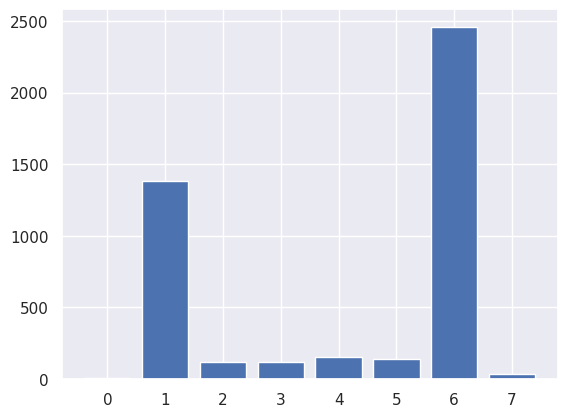

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=chi2, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

y_train = df_train["two_year_recid"]
X_train = df_train.drop(["two_year_recid"], axis = 1)
y_dev = df_dev["two_year_recid"]
X_dev = df_dev.drop(["two_year_recid"], axis = 1)

src_cols = ['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
            'juv_other_count', 'priors_count', 'c_charge_degree']
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_dev)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature:' , (src_cols[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

`SelectKBest` được sử dụng để chọn ra các đặc trưng quan trọng từ tập dữ liệu. Điểm số của mỗi đặc trưng được tính bằng phương pháp kiểm định chi bình phương (`chi2`). Các điểm số này được in ra và hiển thị trên đồ thị histogram để giúp quyết định xem nên giữ lại hay loại bỏ các đặc trưng dựa trên độ quan trọng của chúng.

Những đặc trưng nào có điểm số nhỏ, nhóm cân nhắc loại bỏ chúng đi. Cụ thể nhóm sẽ loại bỏ đặc trưng là "sex" và "c_charge_degree"

Bước Feature Selection sử dụng phương pháp Chi-square để chọn ra các đặc trưng quan trọng nhất. Số lượng đặc trưng được chọn có thể được xác định bằng tham số k trong SelectKBest.

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

src_cols = ['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
            'juv_other_count', 'priors_count', 'c_charge_degree']

selected_cols = ['age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count']
y_train = df_train["two_year_recid"]
X_train = df_train[selected_cols]

y_dev = df_dev["two_year_recid"]
X_dev = df_dev[selected_cols]

In [ ]:
models_chi_square = []
#
models_chi_square.append(("1. LGBM", lgbm_model))
models_chi_square.append(('2. GBC', gb_model))
models_chi_square.append(("3. XGB", xgb_model))
models_chi_square.append(('4. DT', dt_model))
models_chi_square.append(("5. AdaB", adaboost_model))
models_chi_square.append(("6. SGD", sgd_model))
models_chi_square.append(('7. LR', lr_model))
models_chi_square.append(('8. KNN', knn_model))
models_chi_square.append(('9.SVM', svm_model))
models_chi_square.append(('10. RF', rf_model))

In [ ]:
results = []
names = []
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, average='macro')
for name, model in models_chi_square:
        kfold = KFold(n_splits = 10,shuffle = True, random_state = 12345)
        cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= scorer)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Kết quả đánh giá lại hiệu suất phân loại của các base model sau khi áp dụng kĩ thuật Chi-square là loại bỏ đi 2 cột "sex" và "c_charge_degree".

**Nhận xét:** Phương pháp Chi-Square Feature Selection đã chứng minh độ hiệu quả của mình trong việc cải thiện hiệu suất của nhiều mô hình học máy cơ bản. Cụ thể, một số mô hình như XGBoost (XGB), AdaBoost (AdaB), Stochastic Gradient Descent (SGD), Logistic Regression (LR), K-Nearest Neighbors (KNN), và Random Forest (RF) đã đạt được sự cải thiện đáng kể trong khả năng phân loại sau khi áp dụng kỹ thuật này.

Việc thấy đổi trong kết quả F1 Score của các mô hình sau Chi-Square Feature Selection là rất đáng chú ý. Điều này cho thấy tính linh hoạt và hiệu quả của phương pháp Chi-Square trong việc lựa chọn đặc trưng, giúp mô hình tận dụng thông tin quan trọng và giảm nhiễu từ các đặc trưng không quan trọng.

Tuy nhiên, không phải tất cả các mô hình đều có sự cải thiện. Điều này có thể là do một số mô hình đã được thiết kế để xử lý dữ liệu có đặc điểm cụ thể và không được hưởng lợi nhiều từ việc loại bỏ các đặc trưng không quan trọng. Mặc dù vậy, kết quả tổng thể cho thấy Chi-Square Feature Selection là một công cụ hữu ích để tối ưu hóa hiệu suất của mô hình trong trường hợp này.

In [ ]:
current_col = ['age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count']

### Mutual Information Feature Selection

Feature: ('sex', 0.005143002905257488)
Feature: ('age', 0.019765288520849467)
Feature: ('race', 0.00836623330169517)
Feature: ('juv_fel_count', 0.0025242691342266532)
Feature: ('juv_misd_count', 0.012468572772017295)
Feature: ('juv_other_count', 0.013094640644697675)
Feature: ('priors_count', 0.049620442813802956)
Feature: ('c_charge_degree', 0.0)


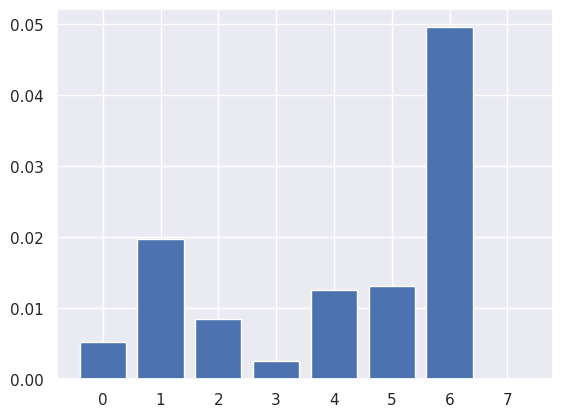

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

y_train = df_train["two_year_recid"]
X_train = df_train.drop(["two_year_recid"], axis = 1)
y_dev = df_dev["two_year_recid"]
X_dev = df_dev.drop(["two_year_recid"], axis = 1)

src_cols = ['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
            'juv_other_count', 'priors_count', 'c_charge_degree']
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_dev)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature:' , (src_cols[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Đoạn mã này sử dụng phương pháp Mutual Information (mutual_info_classif) thay vì phương pháp chi-square. Phương pháp Mutual Information thường được sử dụng để đo lường mức độ liên quan giữa biến độc lập và biến phụ thuộc trong bài toán phân loại.


Ý tưởng của kỹ thuật mutual information feature selection trong đoạn code trên là đo lường mức độ liên kết (information gain) giữa mỗi đặc trưng và biến phụ thuộc (trong trường hợp này là "two_year_recid"). Mutual information giúp đánh giá cảm giác thông tin mà mỗi đặc trưng mang lại về biến phụ thuộc, làm cho chúng ta có thể chọn ra các đặc trưng quan trọng nhất để sử dụng trong mô hình học máy. Cụ thể, kỹ thuật này được thực hiện thông qua việc sử dụng SelectKBest để chọn ra một số lượng "k" đặc trưng tốt nhất dựa trên mutual information scores. Các scores được in ra và hiển thị trên đồ thị để ta có cái nhìn tổng quan về độ quan trọng của từng đặc trưng.

Khi áp dụng Mutual Information, nhóm quyết định loại bỏ đi 4 cột có điểm số là thấp nhât. Bốn cột đó là: 'sex', 'juv_fel_count',
            'juv_other_count', 'priors_count'.

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

src_cols = ['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
            'juv_other_count', 'priors_count', 'c_charge_degree']

selected_cols = ['age', 'juv_fel_count',
       'juv_other_count', 'priors_count']
y_train = df_train["two_year_recid"]
X_train = df_train[selected_cols]

y_dev = df_dev["two_year_recid"]
X_dev = df_dev[selected_cols]

In [ ]:
models_mutual = []
#
models_mutual.append(("1. LGBM", lgbm_model))
models_mutual.append(('2. GBC', gb_model))
models_mutual.append(("3. XGB", xgb_model))
models_mutual.append(('4. DT', dt_model))
models_mutual.append(("5. AdaB", adaboost_model))
models_mutual.append(("6. SGD", sgd_model))
models_mutual.append(('7. LR', lr_model))
models_mutual.append(('8. KNN', knn_model))
models_mutual.append(('9.SVM', svm_model))
models_mutual.append(('10. RF', rf_model))

In [ ]:
results = []
names = []
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, average='macro')
for name, model in models_mutual:
        kfold = KFold(n_splits = 10,shuffle = True, random_state = 12345)
        cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= scorer)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

**Nhận xét:** Khi thực hiện Mutual Information Feature Selection, hiệu suất của nhiều mô hình cơ bản đã được cải thiện đáng kể. So sánh với kết quả từ Chi-Square Feature Selection, ta thấy Mutual Information thường cho hiệu quả tốt hơn ở một số mô hình như LightGBM (LGBM), Gradient Boosting Classifier (GBC), và Extreme Gradient Boosting (XGB). Tuy nhiên, đối với một số mô hình như Logistic Regression (LR), Support Vector Machine (SVM), và K-Nearest Neighbors (KNN), Mutual Information lại cho thấy hiệu suất thấp hơn so với Chi-Square.

Dựa vào sự biến động trong hiệu suất của các phương pháp Feature Selection, ta nhận thấy rằng tác động của chúng phụ thuộc vào đặc tính cụ thể của từng mô hình. Cụ thể hơn, Mutual Information có thể giúp nâng cao khả năng phân loại cho các mô hình có đặc tính đặc biệt, trong khi Chi-Square có thể phù hợp hơn cho một số mô hình khác. Việc lựa chọn phương pháp phù hợp với mô hình cụ thể là quan trọng để đạt được hiệu suất tốt nhất trong quá trình Feature Selection.

**Tổng kết:** Nhóm quyết định chọn kỹ thuật Chi-Square làm phương pháp feature selection cuối cùng và thực hiện việc loại bỏ hai cột "sex" và "c_charge_degree" từ bộ dữ liệu gốc. Lựa chọn của nhóm dựa trên so sánh kết quả giữa Chi-Square và Mutual Information. Chi-Square được ưu tiên vì nó đã cho thấy hiệu suất tốt hơn đối với nhiều biểu đồ đặc trưng, không chỉ giữa hai mô hình cụ thể. Nhóm quan sát thấy rằng kỹ thuật Chi-Square thường phù hợp với bài toán phân loại và có xu hướng loại bỏ những đặc trưng không ảnh hưởng đến quyết định phân loại một cách hiệu quả, giảm chiều của dữ liệu mà vẫn giữ được sức mạnh dự đoán. Do đó, lựa chọn này được đưa ra với hy vọng tối ưu hóa hiệu suất và đơn giản hóa mô hình của nhóm, đặc biệt trong trường hợp của mô hình đơn giản như Logistic Regression.

## Over sample

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

selected_cols = ['age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count']
y_train = df_train["two_year_recid"]
X_train = df_train[selected_cols]

y_dev = df_dev["two_year_recid"]
X_dev = df_dev[selected_cols]

# Sử dụng SMOTE để oversample lớp thiểu số
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



Over-sampling với SMOTE được sử dụng để cân bằng lại tỷ lệ giữa các lớp trong bài toán phân loại, đặc biệt khi có sự mất cân đối giữa lớp thiểu số và lớp đa số. SMOTE tạo ra dữ liệu tổng hợp mới cho lớp thiểu số, cung cấp độ đa dạng và cân bằng cho mô hình.

Sử dụng SMOTE để tạo dữ liệu mới bằng cách tổng hợp mẫu từ lớp thiểu số, giúp cân bằng tỷ lệ giữa các lớp.

In [ ]:
models_oversample = []
#
models_oversample.append(("1. LGBM", lgbm_model))
models_oversample.append(('2. GBC', gb_model))
models_oversample.append(("3. XGB", xgb_model))
models_oversample.append(('4. DT', dt_model))
models_oversample.append(("5. AdaB", adaboost_model))
models_oversample.append(("6. SGD", sgd_model))
models_oversample.append(('7. LR', lr_model))
models_oversample.append(('8. KNN', knn_model))
models_oversample.append(('9.SVM', svm_model))
models_oversample.append(('10. RF', rf_model))

In [ ]:
results = []
names = []
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, average='macro')
for name, model in models_oversample:
        kfold = KFold(n_splits = 10,shuffle = True, random_state = 12345)
        cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= scorer)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Nhận xét: Hiệu suất phân loại của các mô hình tăng lên tốt hơn sau khi áp dụng kỹ thuật oversample, chứng tỏ oversampling đã giúp cải thiện khả năng dự đoán của mô hình đối với lớp thiểu số, giảm hiện tượng mất cân bằng dữ liệu và tăng khả năng tái tạo mô hình đối với các trường hợp hiếm. Điều này làm tăng khả năng tổng quát hóa của mô hình trên dữ liệu mới và cải thiện đáng kể độ chính xác và khả năng dự đoán.

Để nhận xét về sự tăng hiệu suất sau khi oversample, chúng ta có thể so sánh sự thay đổi trong điểm số F1 của mỗi mô hình trước và sau khi áp dụng oversampling. Đối với mỗi mô hình, ta so sánh sự tăng giảm của điểm số F1 giữa hai điều kiện (chưa oversample và sau khi oversample).

LGBM: Tăng từ 0.661692 lên 0.667297.

GBC: Tăng từ 0.659376 lên 0.670774.

XGB: Tăng từ 0.635948 lên 0.642519.

DT: Tăng từ 0.645643 lên 0.662382.

AdaB: Tăng từ 0.618853 lên 0.627665.

SGD: Tăng từ 0.653745 lên 0.664469.

LR: Tăng từ 0.662997 lên 0.666702.

KNN: Tăng từ 0.623394 lên 0.643909.

SVM: Tăng từ 0.664236 lên 0.672736.

RF: Tăng từ 0.663965 lên 0.666290.

Dựa trên những số liệu trên, có vẻ rằng tất cả các mô hình đều có xu hướng tăng hiệu suất sau khi áp dụng oversampling. Tuy nhiên, đối với mỗi mô hình, sự tăng cường có thể không đồng đều.

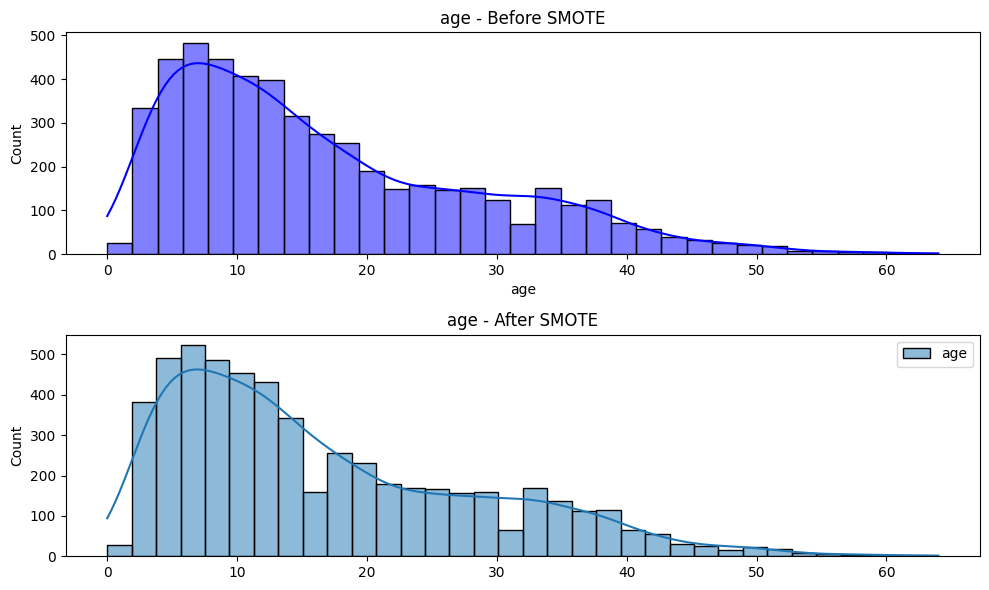

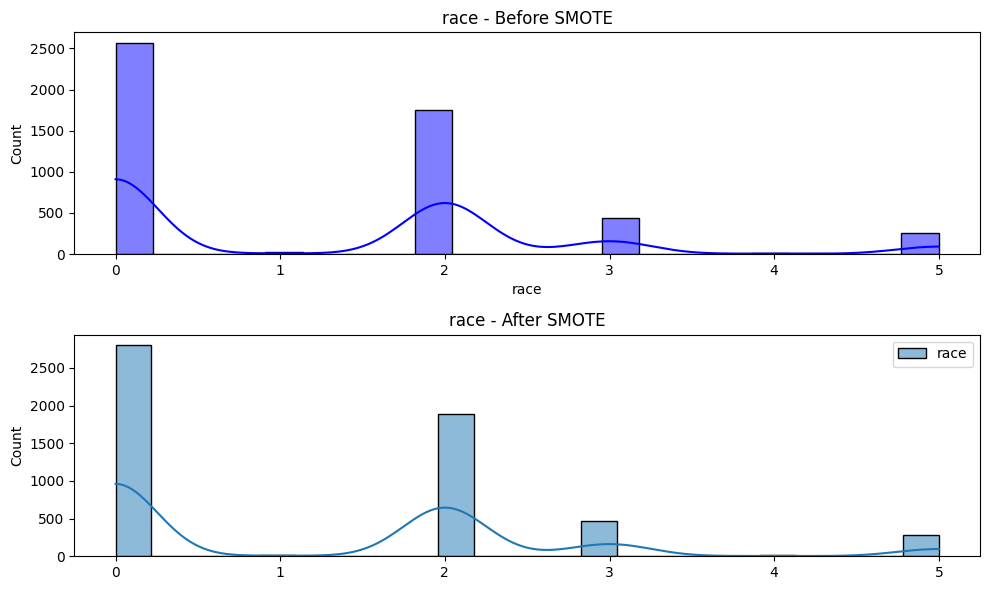

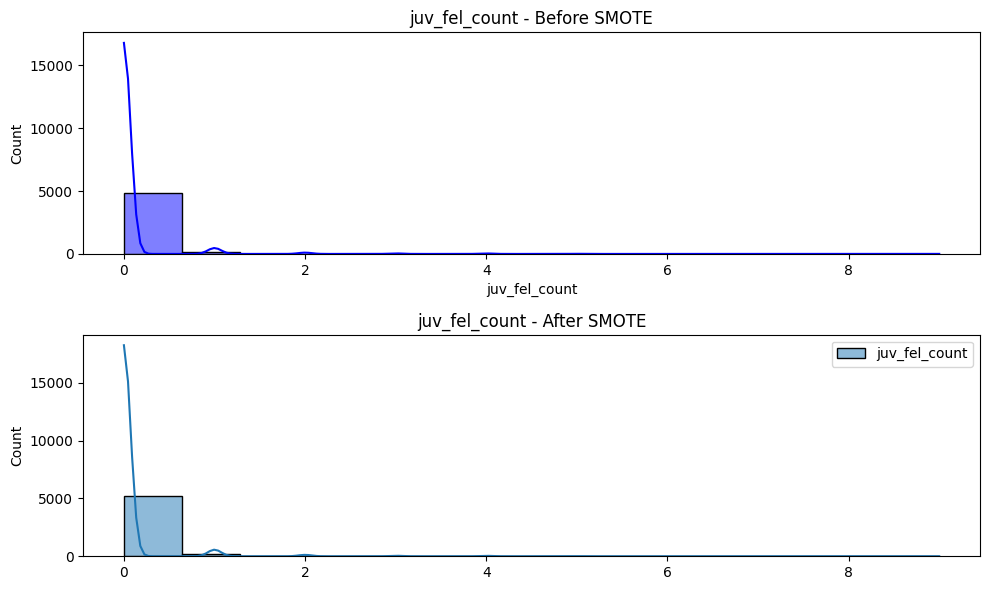

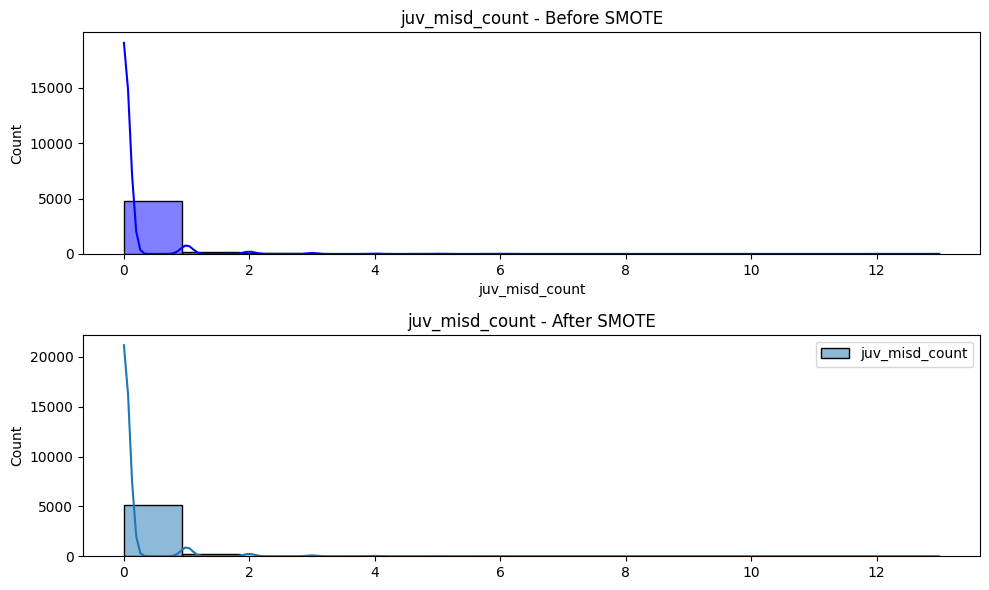

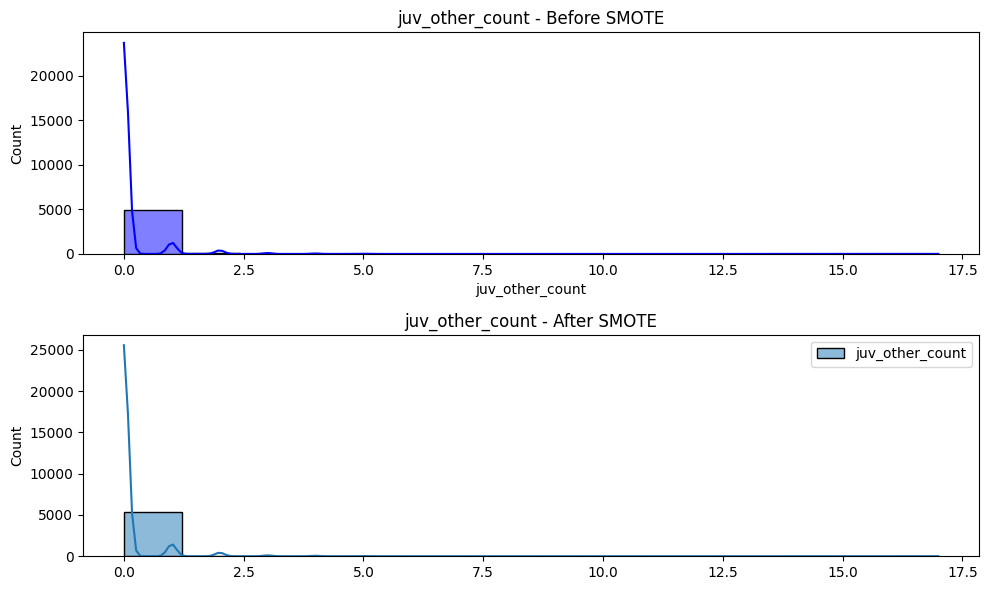

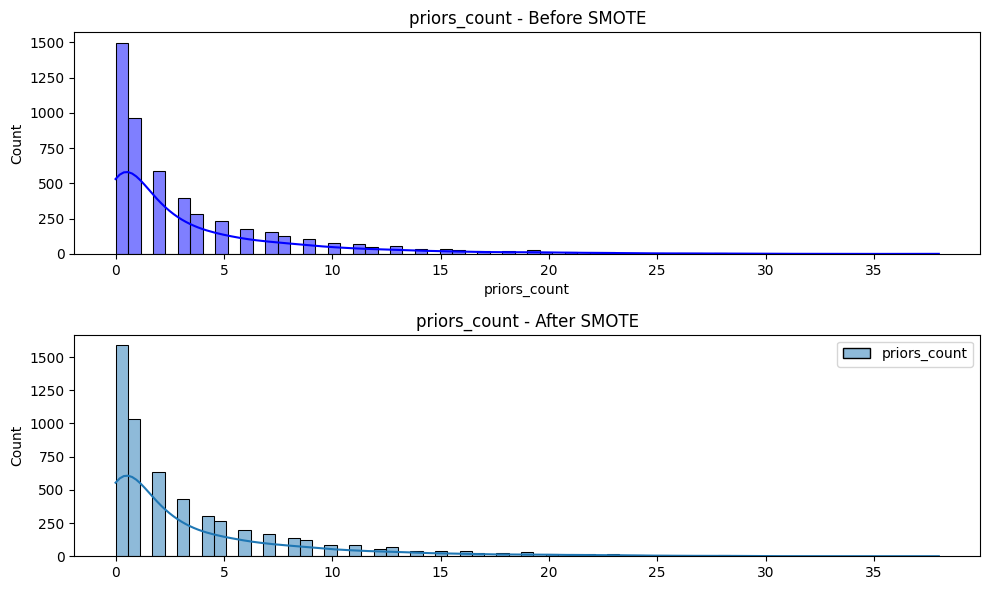

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
selected_cols = ['age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count']
y_train = df_train["two_year_recid"]
X_train = df_train[selected_cols]
# Vẽ biểu đồ histogram cho từng cột
for col in X_train.columns:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    sns.histplot(X_train[col], kde=True, color='blue', label='Before SMOTE')
    plt.title(f'{col} - Before SMOTE')

    # Sử dụng SMOTE để oversample lớp thiểu số
    smote = SMOTE(random_state=42)
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train[[col]], y_train)

    plt.subplot(2, 1, 2)
    sns.histplot(X_train_oversampled, kde=True, color='orange', label='After SMOTE')
    plt.title(f'{col} - After SMOTE')

    plt.tight_layout()
    plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

selected_cols = ['age', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']
X_train = df_train[selected_cols]
y_train = df_train["two_year_recid"]  # Thêm dòng này để đảm bảo có y_train

# In giá trị của X_train và y_train trước khi oversample
print("X_train before SMOTE:")
print(X_train)
print("y_train before SMOTE:")
print(y_train)

# Sử dụng SMOTE để oversample lớp thiểu số
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# In giá trị của X_train và y_train sau khi oversample
print("X_train after SMOTE:")
print(X_train_oversampled)
print("y_train after SMOTE:")
print(y_train_oversampled)




X_train before SMOTE:
       age  race  juv_fel_count  juv_misd_count  juv_other_count  priors_count
0     20.0   0.0              1               1                0             9
1     33.0   2.0              0               0                0             4
2     20.0   3.0              0               0                0             0
3     24.0   2.0              0               0                0             0
4     15.0   0.0              0               0                0             1
...    ...   ...            ...             ...              ...           ...
5044  15.0   0.0              0               0                0             3
5045   6.0   3.0              0               0                0             0
5046  39.0   0.0              0               0                0             0
5047  15.0   2.0              0               0                0             0
5048   7.0   0.0              0               3                1             8

[5049 rows x 6 columns]
y_tra

Dữ liệu sau khi áp dụng phương pháp oversample (SMOTE) đã thay đổi so với trước khi oversample. Trước khi oversample, `X_train` có kích thước là 5049 dòng và `y_train` có 5049 giá trị. Dữ liệu này đặc trưng bởi sự mất cân bằng giữa các lớp, với một số lớp có số lượng mẫu ít hơn.

Sau khi oversample, kích thước của `X_train` đã tăng lên thành 5474 dòng và `y_train` cũng tăng lên tương ứng. Các giá trị trong `X_train` đã thay đổi do việc tạo thêm các mẫu mới. Cụ thể, SMOTE đã tạo ra các mẫu giả định dựa trên mẫu hiện có, làm tăng sự đa dạng của dữ liệu. Điều này đã làm cân bằng lượng mẫu giữa các lớp và có thể giúp mô hình học tốt hơn từ dữ liệu đa dạng hơn.

Tóm lại, sau khi oversample, dữ liệu `X_train` và `y_train` đã trở nên cân bằng hơn, có thêm các mẫu mới, và mô hình có thể được huấn luyện trên tập dữ liệu cân bằng này để cải thiện khả năng tổng quát hóa.

##Model selection

In [ ]:
# Validation scores of all base models
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('GBC', GradientBoostingClassifier(random_state = 12345)))
models.append(("XGB", XGBClassifier(random_state = 12345)))
models.append(("AdaB",AdaBoostClassifier(random_state = 12345)))
models.append(("SGD",SGDClassifier(random_state = 12345)))
models.append(("LGBM", LGBMClassifier(verbose=0, random_state = 12345)))

Đoạn code trên tạo ra danh sách các mô hình cơ bản để sử dụng trong quá trình đánh giá và so sánh hiệu suất. Mỗi mô hình được thêm vào danh sách models với tên viết tắt của nó và được khởi tạo với các tham số mặc định. Các mô hình bao gồm Logistic Regression (LR), K-Nearest Neighbors (KNN), Decision Tree (DT), Random Forest (RF), Support Vector Machine (SVM), Gaussian Naive Bayes (GNB), Gradient Boosting (GBC), XGBoost (XGB), AdaBoost (AdaB), Stochastic Gradient Descent (SGD), và LightGBM (LGBM).

LR: 0.662673 (0.020310)
KNN: 0.619524 (0.021727)
DT: 0.607964 (0.021809)
RF: 0.624890 (0.021171)
SVM: 0.654651 (0.020438)
GNB: 0.536880 (0.024492)
GBC: 0.662495 (0.021533)
XGB: 0.638091 (0.029530)
AdaB: 0.663917 (0.029121)
SGD: 0.595758 (0.039583)
LGBM: 0.654474 (0.025459)


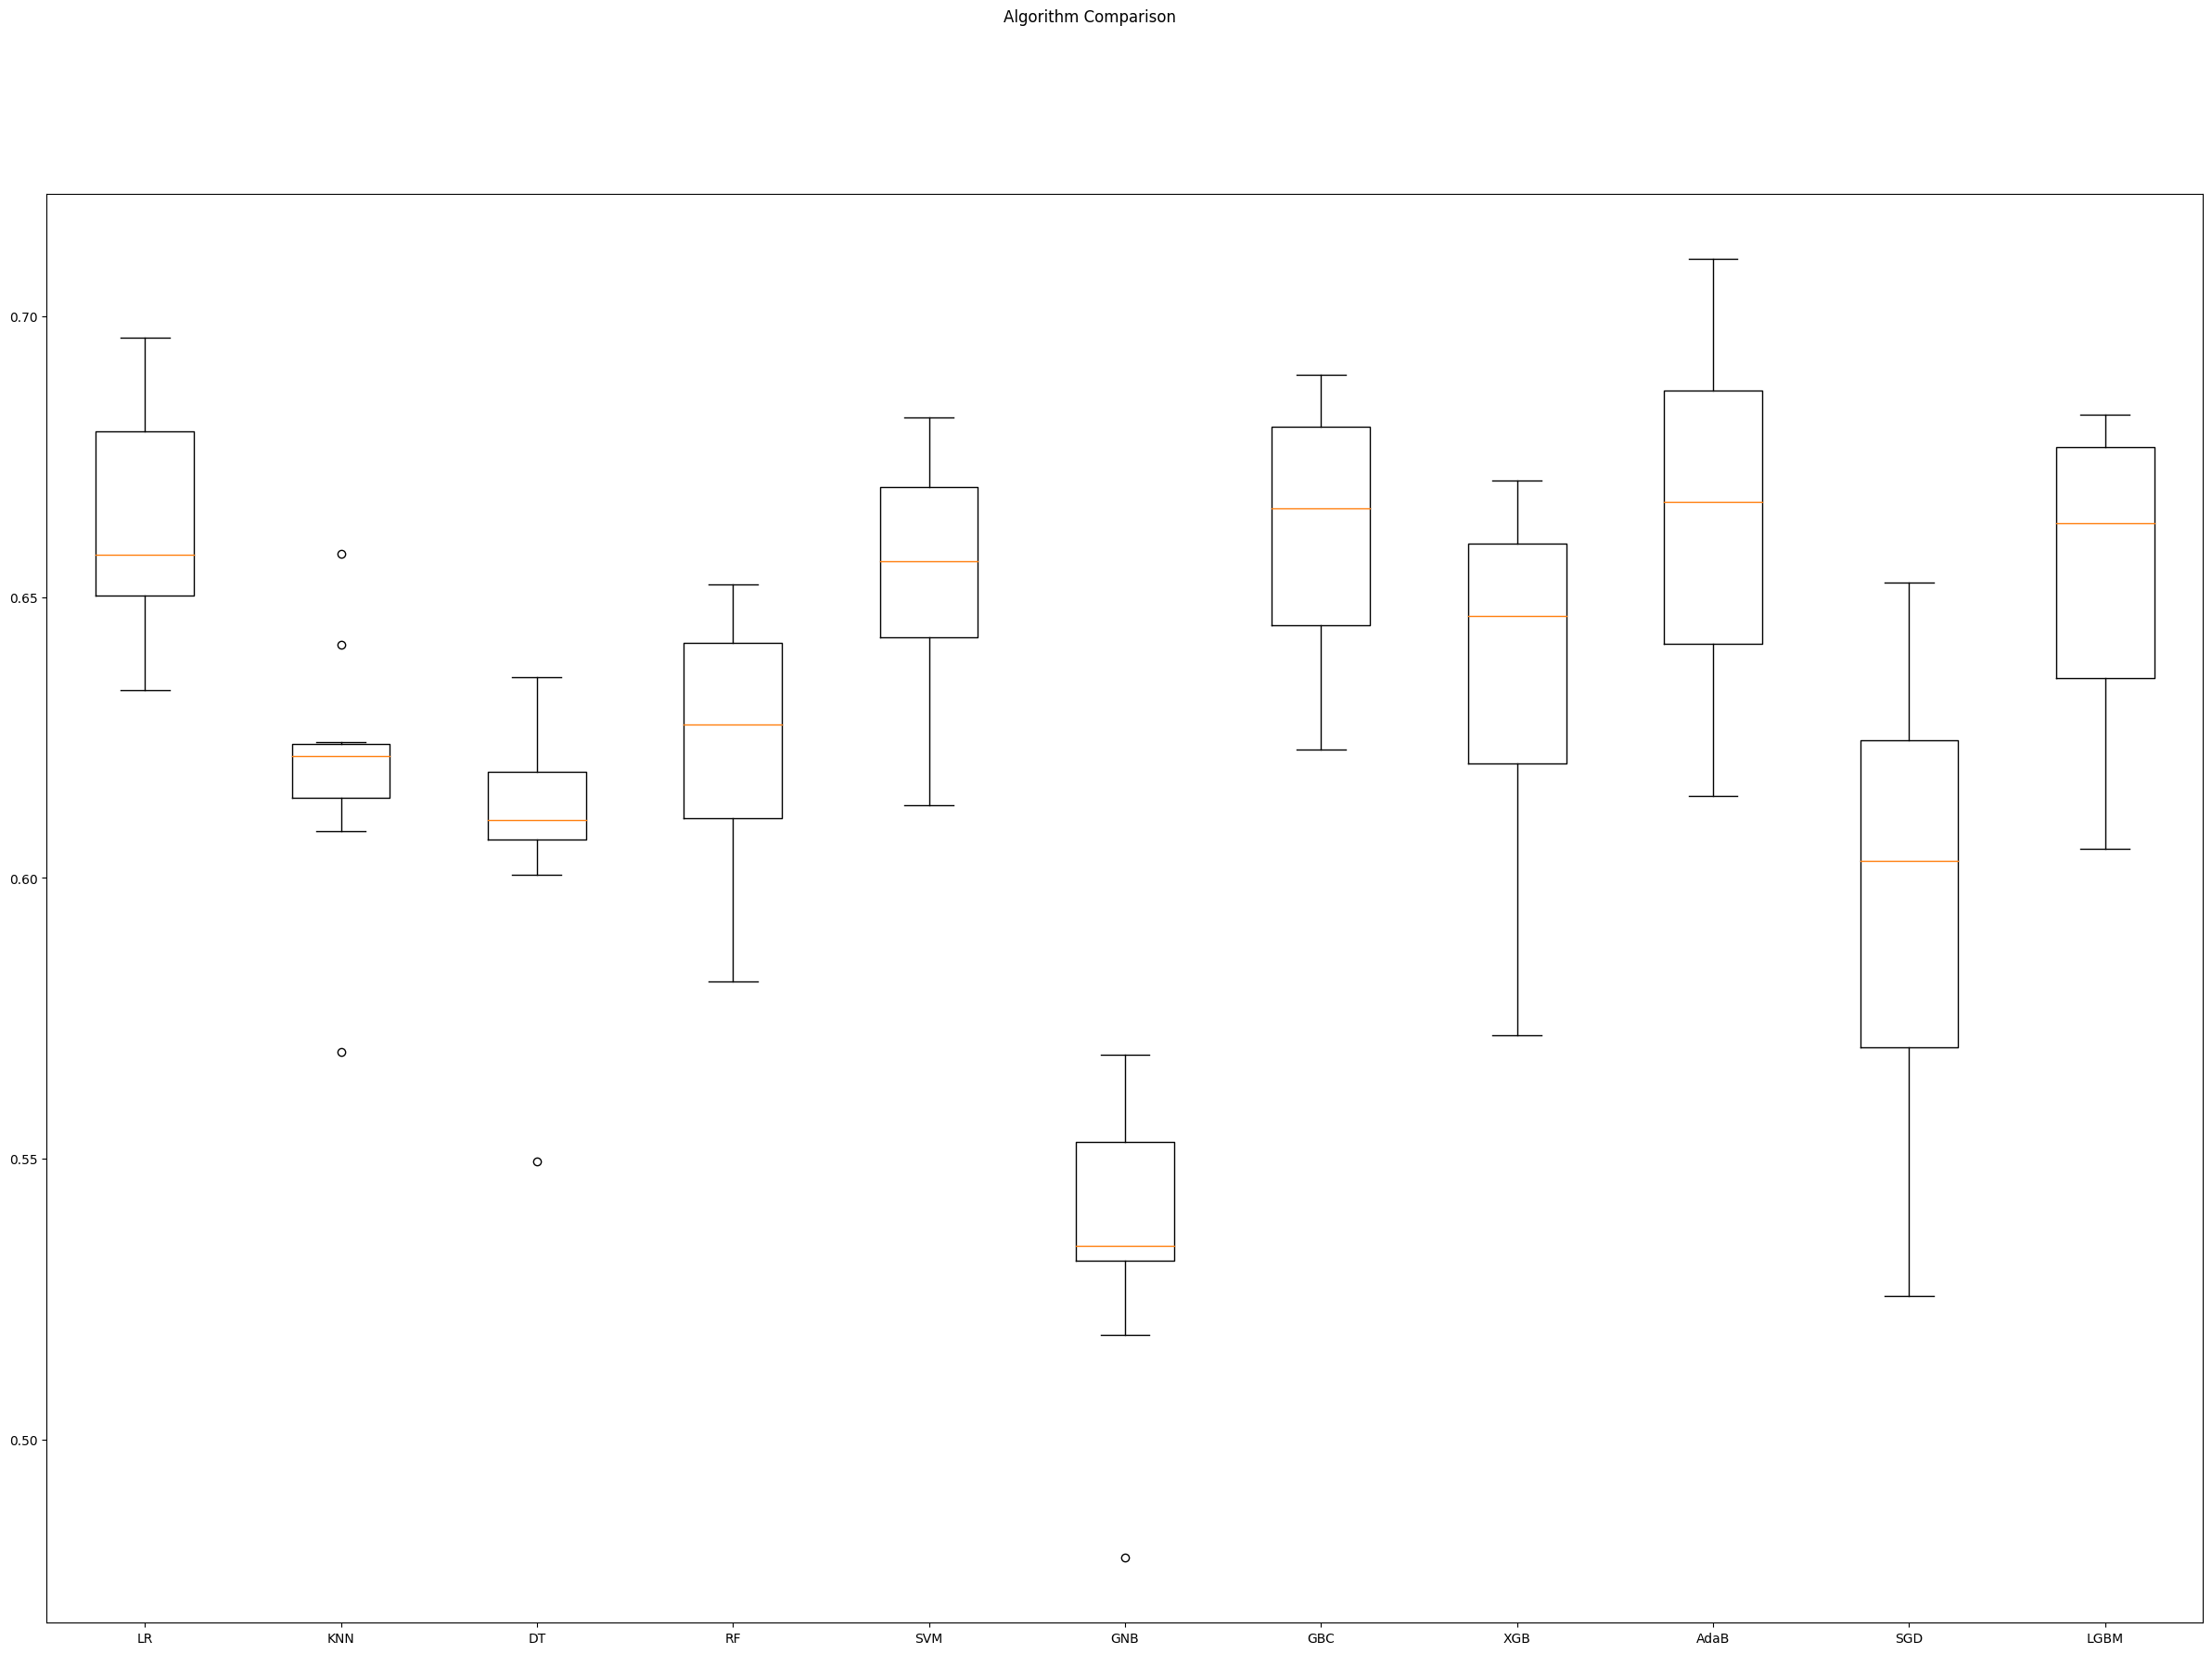

In [ ]:
results = []
names = []
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, average='macro')
for name, model in models:
        kfold = KFold(n_splits = 10,shuffle = True, random_state = 12345)
        cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= scorer)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(30,20))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Đánh giá và so sánh hiệu suất của nhiều mô hình máy học sử dụng phương pháp Cross-Validation. Đối với mỗi mô hình, F1 Score được sử dụng làm độ đo, và kết quả được hiển thị thông qua giá trị trung bình và độ lệch chuẩn. Biểu đồ boxplot cuối cùng giúp so sánh phân phối hiệu suất của các mô hình.



## **Model** **Tuning**

### **1. LightGBM**

Tunning

In [ ]:
lgbm = LGBMClassifier(random_state = 12345)

lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

gs_cv = GridSearchCV(lgbm,
                     lgbm_params,
                     cv = 5,
                     n_jobs = -1,
                     verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[LightGBM] [Info] Number of positive: 175, number of negative: 354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330813 -> initscore=-0.704511
[LightGBM] [Info] Start training from score -0.704511
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

Final LightGBM

In [ ]:
lgbm_tuned = LGBMClassifier(learning_rate = 0.01, max_depth= 3, n_estimators= 500).fit(X_train,y_train)
lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

y_pred = lgbm_tuned.predict(X_dev)
f1 = f1_score(y_dev,y_pred)
print(classification_report(y_dev,y_pred, digits = 4))

[LightGBM] [Info] Number of positive: 2312, number of negative: 2737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 5049, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457912 -> initscore=-0.168749
[LightGBM] [Info] Start training from score -0.168749
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

### **2. GrandientBoosting**

Tuning

In [ ]:
gbc = GradientBoostingClassifier(random_state = 12345)

gbc_params = {
    "learning_rate": [0.01, 0.1, 0.5, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}
gbc_cv_model  = GridSearchCV(gbc,gbc_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)


Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [ ]:
gbc_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 0.23333333333333334,
 'n_estimators': 100,
 'subsample': 1.0}

final GBC

In [ ]:
gbc_tuned = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 8, min_samples_split = 0.14444444444444446,  n_estimators = 100, subsample = 0.9)
gbc_tuned = gbc_tuned.fit(X_train,y_train)
y_pred = gbc_tuned.predict(X_dev)
f1 = f1_score(y_dev,y_pred)
print(classification_report(y_dev,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7163    0.7568    0.7360       407
           1     0.6598    0.6115    0.6347       314

    accuracy                         0.6935       721
   macro avg     0.6880    0.6841    0.6853       721
weighted avg     0.6917    0.6935    0.6919       721



### **3. XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_dev)

xgb_f1 = f1_score(y_dev, y_pred)
print(classification_report(y_dev,y_pred, digits = 4))




              precision    recall  f1-score   support

           0     0.6734    0.7396    0.7049       407
           1     0.6131    0.5350    0.5714       314

    accuracy                         0.6505       721
   macro avg     0.6433    0.6373    0.6382       721
weighted avg     0.6471    0.6505    0.6468       721



### **4. DecisionTree**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)
# best parameters

print(grid_search_dt.best_params_)
# best score

grid_search_dt.best_score_
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_dev)

dtc_f1 = f1_score(y_dev, y_pred)
print('F1 Score:', dtc_f1)
dtc_acc = accuracy_score(y_dev, y_pred)
print(dtc_acc)
print(classification_report(y_dev,y_pred, digits = 4))


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 3, 'splitter': 'random'}
F1 Score: 0.5545927209705372
0.6435506241331485
              precision    recall  f1-score   support

           0     0.6638    0.7469    0.7029       407
           1     0.6084    0.5096    0.5546       314

    accuracy                         0.6436       721
   macro avg     0.6361    0.6282    0.6287       721
weighted avg     0.6396    0.6436    0.6383       721



### **5. Adaboost**

In [ ]:
# Thiết lập tham số cho AdaBoostClassifier
ada_params = {
    'base_estimator': [dtc],
    'n_estimators': [180]  # Bạn có thể thay đổi giá trị này tùy ý
}

# Tìm kiếm siêu tham số tốt nhất với GridSearchCV
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=12345), ada_params, cv=5, n_jobs=-1)
grid_search_ada.fit(X_train, y_train)

# Sử dụng tham số tốt nhất để tạo mô hình AdaBoostClassifier
best_ada_model = AdaBoostClassifier(random_state=12345, **grid_search_ada.best_params_)
best_ada_model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred_ada = best_ada_model.predict(X_dev)

# Tính toán F1 Score và Accuracy
ada_f1 = f1_score(y_dev, y_pred_ada)
ada_acc = accuracy_score(y_dev, y_pred_ada)

# In kết quả
print('F1 Score (AdaBoost):', ada_f1)
print('Accuracy (AdaBoost):', ada_acc)
print(classification_report(y_dev, y_pred_ada, digits=4))

F1 Score: 0.5675675675675675
0.6449375866851595
              precision    recall  f1-score   support

           0     0.6704    0.7297    0.6988       407
           1     0.6043    0.5350    0.5676       314

    accuracy                         0.6449       721
   macro avg     0.6374    0.6324    0.6332       721
weighted avg     0.6416    0.6449    0.6417       721



### **6. SGDClassifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)

sgd = SGDClassifier(grid_search.best_params_)
sgd.fit(X_train, y_train)
# model predictions

y_pred = sgd.predict(X_dev)

sgd_f1 = f1_score(y_dev, y_pred)
print('F1 Score:', sgd_f1)
sgd_acc = accuracy_score(y_dev, y_pred)
print(sgd_acc)
print(classification_report(y_dev,y_pred, digits = 4))

F1 Score: 0.5613305613305614
0.7073509015256588
              precision    recall  f1-score   support

           0     0.6769    0.9214    0.7804       407
           1     0.8084    0.4299    0.5613       314

    accuracy                         0.7074       721
   macro avg     0.7426    0.6757    0.6709       721
weighted avg     0.7342    0.7074    0.6850       721



### **7. Logistic Regression**

In [ ]:
# Find best hyperparameters (accuracy)
log_clf = LogisticRegression(random_state =12345 )
param_grid = {
            'penalty' : ['l2','l1'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}


In [ ]:
#Log with best hyperparameters
CV_log_clf = LogisticRegression(solver='lbfgs', C = 0.1,
                                penalty = 'l2',
                                random_state = 42)

CV_log_clf.fit(X_train, y_train)
y_pred = CV_log_clf.predict(X_dev)

log_reg_f1 = f1_score(y_dev, y_pred)
print('F1 Score:', log_reg_f1)
log_reg_acc = accuracy_score(y_dev, y_pred)
print(log_reg_acc)
print(classification_report(y_dev,y_pred, digits = 4))

F1 Score: 0.6355475763016157
0.7184466019417476
              precision    recall  f1-score   support

           0     0.7134    0.8378    0.7706       407
           1     0.7284    0.5637    0.6355       314

    accuracy                         0.7184       721
   macro avg     0.7209    0.7008    0.7031       721
weighted avg     0.7199    0.7184    0.7118       721



### **8. KNeighborsClassifier**

In [ ]:
knn = KNeighborsClassifier()

# Thiết lập tham số cho KNeighborsClassifier
knn_params = {
    'n_neighbors': [3, 5, 7],  # Thay đổi giá trị tùy ý
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Tìm kiếm siêu tham số tốt nhất với GridSearchCV
grid_search = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Sử dụng tham số tốt nhất để tạo mô hình KNeighborsClassifier
best_knn_model = KNeighborsClassifier(**grid_search.best_params_)
best_knn_model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred_knn = best_knn_model.predict(X_dev)

# Tính toán F1 Score và Accuracy
knn_f1 = f1_score(y_dev, y_pred_knn)
knn_acc = accuracy_score(y_dev, y_pred_knn)

# In kết quả
print('F1 Score (KNN):', knn_f1)
print('Accuracy (KNN):', knn_acc)
print(classification_report(y_dev, y_pred_knn, digits=4))

F1 Score: 0.5941558441558442
0.6532593619972261
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       407
           1       0.61      0.58      0.59       314

    accuracy                           0.65       721
   macro avg       0.65      0.65      0.65       721
weighted avg       0.65      0.65      0.65       721



### **9. Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)
# best parameters

grid_search.best_params_

# best accuracy

grid_search.best_score_

svc = SVC(grid_search.best_params_)
svc.fit(X_train, y_train)

# model predictions

y_pred = svc.predict(X_dev)

svc_f1 = f1_score(y_dev, y_pred)
print('F1 Score:', svc_f1)
svc_acc = accuracy_score(y_dev, y_pred)
print(svc_acc)
print(classification_report(y_dev,y_pred, digits = 4))

F1 Score: 0.6279863481228668
0.6976421636615812
              precision    recall  f1-score   support

           0     0.7105    0.7838    0.7453       407
           1     0.6765    0.5860    0.6280       314

    accuracy                         0.6976       721
   macro avg     0.6935    0.6849    0.6867       721
weighted avg     0.6957    0.6976    0.6942       721



### **10. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Thiết lập tham số cho RandomForestClassifier
rand_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 32, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    'n_estimators': [130]  # Bạn cũng có thể thay đổi giá trị tùy ý
}

# Tìm kiếm siêu tham số tốt nhất với GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=12345), rand_params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Sử dụng tham số tốt nhất để tạo mô hình RandomForestClassifier
best_rand_clf_model = RandomForestClassifier(random_state=12345, **grid_search.best_params_)
best_rand_clf_model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred_rand_clf = best_rand_clf_model.predict(X_dev)

# Tính toán F1 Score và Accuracy
rand_clf_f1 = f1_score(y_dev, y_pred_rand_clf)
rand_clf_acc = accuracy_score(y_dev, y_pred_rand_clf)

# In kết quả
print('F1 Score (RandomForest):', rand_clf_f1)
print('Accuracy (RandomForest):', rand_clf_acc)
print(classification_report(y_dev, y_pred_rand_clf, digits=4))

F1 Score: 0.6185567010309279
0.6920943134535368
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       407
           1       0.67      0.57      0.62       314

    accuracy                           0.69       721
   macro avg       0.69      0.68      0.68       721
weighted avg       0.69      0.69      0.69       721



# **4. Result & Discussion**

Nhóm đã thực hiện sử dụng 11 mô hình khác nhau để dự đoán, sau đó fine-tune chúng trên tập kiểm thử và thu được kết quả đánh giá theo giá trị F1 Score (với tham số "macro"). Hiệu suất phân loại của các mô hình theo thứ tự giảm dần như sau:

1. Logistic Regression: 0.7031
2. LightGBM: 0.6879
3. Support Vector Classifier: 0.6867
4. Gradient Boosting: 0.6853
5. Random Forest: 0.6800
6. SGD Classifier: 0.6709
7. KNeighbors Classifier: 0.6500
8. XGBoost Classifier: 0.6382
9. Adaboost: 0.6332
10. Decision Tree: 0.6287

Như vậy, mô hình Logistic Regression đạt được hiệu suất phân loại tốt nhất theo thước đánh giá F1 Score. Nhóm quyết định chọn mô hình này để thực hiện dự đoán trên tập kiểm tra của bộ dữ liệu Compas.

# **5. Kết luận**

Để giải quyết bài toán Compas, nhóm đã thực hiện một loạt các công việc cụ thể. Dưới đây là mô tả chi tiết về từng công đoạn:

1. **Exploratory Data Analysis (EDA):**
   - Nhóm đã thực hiện EDA để khám phá và hiểu rõ hơn về đặc điểm của dữ liệu. Việc này giúp họ có cái nhìn sâu sắc về phân phối của các biến và mối quan hệ giữa chúng.

2. **Tiền xử lý dữ liệu:**
   - Encoding các biến categorical: Nhóm đã chuyển đổi các biến phân loại thành các dạng số để có thể sử dụng trong mô hình hóa.
   - Điền giá trị thiếu: Dữ liệu bị thiếu đã được điền bằng giá trị trung bình của các cột tương ứng trên tập huấn luyện, giả sử tập kiểm tra có thể có giá trị thiếu.
   - Không sử dụng StandScaler: Sau thử nghiệm, nhóm không áp dụng StandScaler vì nhận thấy không đạt được hiệu suất mong muốn.

3. **Feature Selection:**
   - Thử nghiệm các phương pháp Chi-square và Mutual Information để lựa chọn đặc trưng quan trọng. Kết quả cho thấy việc giảm chiều dữ liệu thông qua feature selection cải thiện hiệu suất phân loại. Nhóm đã quyết định dùng kĩ thuật Chi-square để giữ lại các đặc trưng quan trọng và loại bỏ các đặc trưng không ảnh hưởng nhiều đến mục tiêu trong bài toán phân loại.

4. **Oversampling lớp thiểu số:**
   - Nhóm đã sử dụng kỹ thuật oversampling để cân bằng mẫu giữa các lớp, đặc biệt là lớp thiểu số, nhằm cải thiện khả năng dự đoán cho các trường hợp ít xuất hiện.

5. **Model Selection và Fine-tuning:**
   - Thực hiện cross-validation trên các base model để đánh giá hiệu suất. Sau đó, tiến hành fine-tuning bằng cách tìm kiếm siêu tham số tối ưu cho các model sử dụng Grid Search.
   - Mô hình Logistic Regression đã đạt được hiệu suất tốt nhất trên tập kiểm tra với F1_score cao nhất sau quá trình fine-tuning.

6. **Kết quả:**
   - Tất cả các mô hình sau quá trình fine-tuning đều đã có cải thiện đáng kể về hiệu suất. Mô hình Logistic Regression, với bộ tham số tối ưu, đạt được kết quả F1_score tốt nhất trên tập kiểm tra, chứng tỏ tính hiệu quả của phương pháp được lựa chọn.